**Criar o dataset**

In [1]:
import pandas as pd

data = {
    'Usuário': ['Ana', 'Ana', 'Ana', 'Bruno', 'Bruno', 'Carla', 'Carla', 'Daniel', 'Daniel', 'Daniel'],
    'Filme': ['Matrix', 'Avatar', 'Titanic', 'Matrix', 'Avatar', 'Titanic', 'Avatar', 'Matrix', 'Titanic', 'Avatar'],
    'Nota': [5, 4, 1, 5, 5, 2, 4, 4, 3, 3]
}

df = pd.DataFrame(data)
df


,Usuário,Filme,Nota
0,Ana,Matrix,5
1,Ana,Avatar,4
2,Ana,Titanic,1
3,Bruno,Matrix,5
4,Bruno,Avatar,5
5,Carla,Titanic,2
6,Carla,Avatar,4
7,Daniel,Matrix,4
8,Daniel,Titanic,3
9,Daniel,Avatar,3


**Criar a matriz usuário × filme**

In [2]:
tabela = df.pivot_table(index='Usuário', columns='Filme', values='Nota').fillna(0)
tabela


Filme,Avatar,Matrix,Titanic
Usuário,,,
Ana,4.0,5.0,1.0
Bruno,5.0,5.0,0.0
Carla,4.0,0.0,2.0
Daniel,3.0,4.0,3.0


**Calcular similaridade entre usuários**

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

similaridade = cosine_similarity(tabela)
sim_df = pd.DataFrame(similaridade, index=tabela.index, columns=tabela.index)
sim_df


Usuário,Ana,Bruno,Carla,Daniel
Usuário,,,,
Ana,1.000000,0.981981,0.621059,0.926198
Bruno,0.981981,1.000000,0.632456,0.848875
Carla,0.621059,0.632456,1.000000,0.690268
Daniel,0.926198,0.848875,0.690268,1.000000


**Criar a função de recomendação**

In [4]:
def recomendar(usuario):
    similares = sim_df[usuario].sort_values(ascending=False)
    similares = similares.drop(usuario)
    usuario_base = tabela.loc[usuario]
    recomendacoes = pd.Series(dtype=float)

    for nome, grau in similares.items():
        usuario_sim = tabela.loc[nome]
        diferenca = usuario_sim - usuario_base
        diferenca = diferenca[diferenca > 0]
        recomendacoes = recomendacoes.add(diferenca * grau, fill_value=0)

    return recomendacoes.sort_values(ascending=False).head(3)


**Testar recomendações**

In [6]:
recomendar("Ana")


,0
Filme,
Titanic,2.473455
Avatar,0.981981


**Visualização opcional (Matriz Usuário x Filme)**

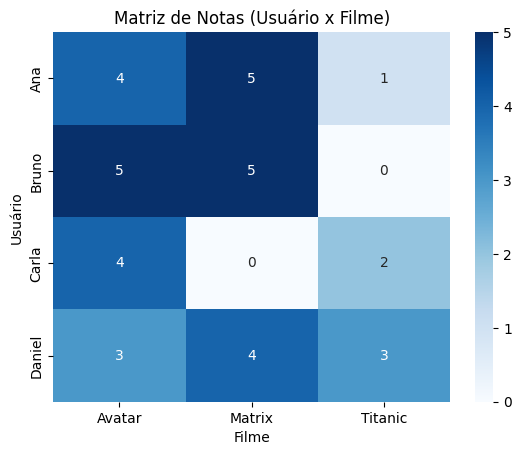

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela, annot=True, cmap='Blues')
plt.title('Matriz de Notas (Usuário x Filme)')
plt.show()
